In [1]:
#import packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Load NCVS data into a pandas dataframe
df = pd.read_table('data/38090-0005-Data.tsv')

In [2]:
df['V4401'].value_counts()

1    5099
9    2944
Name: V4401, dtype: int64

In [3]:
reduced = df[df['V4399']==2]

In [4]:
df['V4402'].value_counts(), reduced['V4402'].value_counts()

(0    4455
 9    2944
 1     644
 Name: V4402, dtype: int64,
 0    4455
 1     644
 Name: V4402, dtype: int64)

In [5]:
reduced['V4421'].value_counts()

0    5087
8      12
Name: V4421, dtype: int64

In [6]:
more_reduced = reduced[reduced['V4421']!=8]

In [7]:
more_reduced['V4421'].value_counts()

0    5087
Name: V4421, dtype: int64

In [8]:
more_reduced['V4401'].value_counts()

1    5087
Name: V4401, dtype: int64

In [9]:
targets = []
for i in range(2,21):
    if(i<10):
        targets.append('V440'+str(i))
    else:
        targets.append('V44' + str(i))
targets

['V4402',
 'V4403',
 'V4404',
 'V4405',
 'V4406',
 'V4407',
 'V4408',
 'V4409',
 'V4410',
 'V4411',
 'V4412',
 'V4413',
 'V4414',
 'V4415',
 'V4416',
 'V4417',
 'V4418',
 'V4419',
 'V4420']

In [125]:
more_reduced[targets]

,V4402,V4403,V4404,V4405,V4406,V4407,V4408,V4409,V4410,V4411,V4412,V4413,V4414,V4415,V4416,V4417,V4418,V4419,V4420
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8034,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8037,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8041,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
encoded = pd.get_dummies(more_reduced, 
               columns = ['V2026', 'V4049', 'V3020', 'V3071', 'V4526AA'])

In [127]:
encoded

,V2001,YEARQ,IDHH,IDPER,V2002,V2003,V2004,V2005,V2006,V2008,...,V3020_45,V3020_98,V3071_1,V3071_2,V3071_8,V3071_9,V4526AA_1,V4526AA_2,V4526AA_3,V4526AA_8
0,2,2020.1,1602014158353447564559137,160201415835344756455913701,9,201,16,02014158353447564559,1,37,...,0,0,1,0,0,0,0,1,0,0
1,2,2020.1,1602071958685392584549331,160207195868539258454933101,9,201,16,02071958685392584549,3,31,...,0,0,0,1,0,0,0,1,0,0
2,2,2020.1,1602071958685392584549331,160207195868539258454933101,9,201,16,02071958685392584549,3,31,...,0,0,0,1,0,0,0,1,0,0
3,2,2020.1,1602071965133498564549121,160207196513349856454912101,5,201,16,02071965133498564549,1,21,...,0,0,1,0,0,0,0,1,0,0
5,2,2020.1,1602073992355333564544321,160207399235533356454432101,8,201,16,02073992355333564544,3,21,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,2,2020.4,1998891392464695568234147,199889139246469556823414701,1,204,19,98891392464695568234,1,47,...,0,0,1,0,0,0,0,1,0,0
8034,2,2020.4,1998891625468390568245147,199889162546839056824514701,2,204,19,98891625468390568245,1,47,...,0,0,0,1,0,0,0,1,0,0
8037,2,2020.4,1998941684460892565945147,199894168446089256594514703,3,204,19,98941684460892565945,1,47,...,0,0,1,0,0,0,0,1,0,0
8041,2,2020.4,1998945258028922565932157,199894525802892256593215701,7,204,19,98945258028922565932,1,57,...,1,0,1,0,0,0,0,1,0,0


In [128]:
lst = ['V2026_1','V2026_2','V2026_3', 'V2026_4', 'V2026_5', 'V2026_6',
             'V2026_7', 'V2026_8', 'V2026_9', 'V2026_10', 'V2026_11', 'V2026_12',
             'V2026_13', 'V2026_15','V2026_16','V2026_17', 'V2026_18',
             'V4049_1', 'V4049_2', 'V4049_3', 'V3071_1', 'V3071_2', 'V4526AA_1', 
       'V4526AA_2', 'V4526AA_3']
lst = lst + v3020
X = encoded[lst]

In [129]:
v3020 = []
not_included = [12,13, 14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,
                31,32,33,34,35,36, 37,38,39]
for i in range(1,46):
    if(i not in not_included):
        v3020.append('V3020_' + str(i))

In [130]:
encoded['V4420'].value_counts()

0    5043
1      44
Name: V4420, dtype: int64

In [131]:
y =encoded[targets]
X = encoded[lst]

In [132]:
y.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [133]:
encoded['V4402'].value_counts().to_numpy()

array([4443,  644])

In [134]:
sm = 0
distribution = []
for i in targets:
    sm += encoded[i].value_counts().to_numpy()[1]
    distribution.append(encoded[i].value_counts().to_numpy()[1])

In [135]:
distribution

[644,
 554,
 1641,
 64,
 147,
 114,
 280,
 297,
 608,
 983,
 316,
 60,
 5,
 176,
 16,
 92,
 371,
 219,
 44]

In [136]:
import matplotlib.pyplot as plt

<BarContainer object of 19 artists>

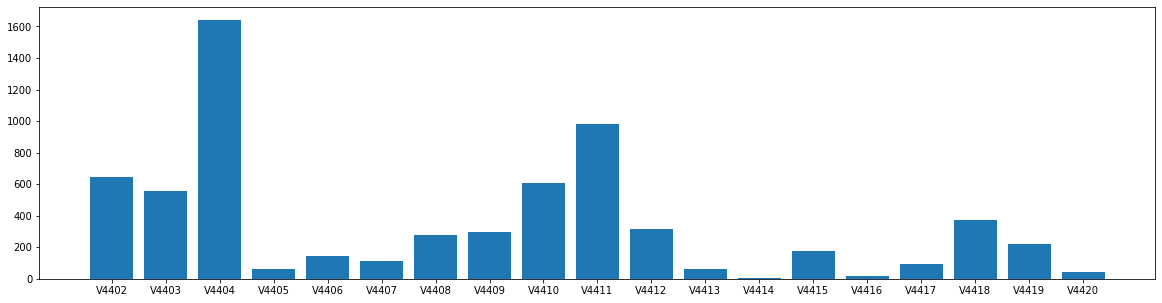

In [140]:

fig = plt.figure(figsize = (20, 5))
plt.bar(targets, distribution)

In [112]:
sm

6631

In [115]:
y_np = y.to_numpy()
count = 0
for i in range(len(y_np)):
    if(np.sum(y_np[i])>1):
        count+=1
count

1119

In [14]:
data2 = pd.get_dummies(reduced, columns=['V2143','V2036','V2020','V3071','V2125','V4025','V4049',
                                      'V4127','V4184','V4234','V4235','V4484','V4524','V4525','V4526AA','V2026','V4017',
                                      'V2034','V2040A','V2047','V2132','V3024','V3046','V3058','V3074','YEARQ','V4048',
                                      'V4095','V4051','V4052','V4053','V4054','V4055','V4056','V4057','V4060','V4062',
                                      'V4064','V4066','V4067','V4068','V4070','V4071','V4072','V4073','V4075',
                                     'V4078','V4080','V4081','V4082','V4083','V4084','V4085','V4086','V4087','V4088',
                                      'V4089','V4090','V4091','V4094','V4095','V4096','V4097','V4098','V4099','V4100',
                                      'V4101','V4102','V4103','V4104','V4105','V4106','V4107','V4124','V4529'])

feature_names = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2','V2020_1','V2020_2','V2020_4','V2020_5'
                ,'V2020_6','V2020_8','V2020_11','V2020_12','V3071_1','V3071_2','V2125_1','V2125_2','V4025_1',
                 'V4025_2','V4049_1','V4049_2','V4127_1','V4127_2','V4184_1','V4184_2','V4234_1','V4234_2','V4235_1',
                 'V4235_2','V4484_1','V4484_2','V4524_1','V4524_2','V4525_1','V4525_2','V4526AA_1','V4526AA_2',
                 'V4526AA_3','V2026_1','V2026_2','V2026_3','V2026_4','V2026_5','V2026_6','V2026_7','V2026_8','V2026_9',
                 'V2026_10','V2026_11','V2026_12','V2026_13','V2026_15','V2026_16','V2026_17','V2026_18','V2033','V2071',
                 'V2072','V4016','V4364','V4017_1','V4017_2','V2034_1','V2034_2','V2034_3','V2034_4','V2034_5','V2040A_1',
                'V2040A_5','V2040A_3','V2040A_4','V2040A_2','V2040A_6','V2040A_7','V2040A_8','V2040A_10','V2040A_15',
                 'V2040A_11','V2040A_19','V2040A_16','V2040A_12','V2040A_18','V2040A_17','V2040A_13',
                 'V2040A_9','V2040A_20','V2047_42','V2047_41','V2047_10','V2047_28','V2047_27','V2047_43','V2047_44',
                 'V2047_11','V2047_40','V2047_9','V2047_45','V2047_7','V2047_8','V2047_0','V2047_6','V2047_3','V2047_2',
                 'V2047_1','V2047_4','V2047_5','V2132_4','V2132_1','V2132_2','V2132_3','V2132_0','V3024_1','V3024_2','V3046_2',
                 'V3046_1','V3058_1','V3058_2','V3074_11','V3074_12','V3074_27','V3074_2','V3074_8','V3074_9',
                'V3074_16','V3074_3','V3074_10','V3074_17','V3074_14','V3074_18','V3074_6','V3074_1','V3074_20','V3074_5',
                'V3074_22','V3074_24','V3074_21','V3074_25','V3074_13','YEARQ_2020.1','YEARQ_2020.2','YEARQ_2020.3',
                 'YEARQ_2020.4','V4048_1','V4048_2','V4095_0','V4095_1','V4051_0','V4051_1','V4052_0','V4052_1','V4053_0',
                'V4053_1','V4054_0','V4054_1','V4055_0','V4055_1','V4056_0','V4056_1','V4057_0','V4060_1',
                 'V4060_2','V4062_1','V4062_2','V4064_1','V4064_2','V4066_0','V4066_1','V4067_0','V4067_1','V4068_0','V4068_1',
                 'V4070_0','V4070_1','V4071_0','V4071_1','V4072_0','V4072_1','V4073_0','V4073_1','V4075_0','V4075_1','V4078_0',
                 'V4078_1','V4080_0', 'V4080_1','V4081_0','V4081_1','V4082_0','V4082_1','V4083_0','V4083_1','V4084_0','V4084_1',
                 'V4085_0','V4085_1','V4086_0','V4086_1','V4087_0','V4087_1','V4088_0','V4088_1','V4089_0','V4089_1',
                 'V4090_0','V4090_1','V4091_0','V4091_1','V4094_0','V4094_1','V4095_0','V4095_1','V4096_0','V4096_1',
                'V4097_0','V4098_0','V4099_0','V4100_0','V4100_1','V4101_0',
                'V4102_0','V4102_1','V4103_0','V4103_1','V4104_0','V4104_1','V4105_0','V4105_1','V4106_0','V4106_1',
                'V4107_0','V4107_1','V4124_2','V4124_7','V4124_10','V4529_55','V4529_56','V4529_54','V4529_57',
                'V4529_17','V4529_11','V4529_58','V4529_12','V4529_40','V4529_14','V4529_32','V4529_10','V4529_1','V4529_41','V4529_31',
                'V4529_59','V4529_20','V4529_33','V4529_13','V4529_5','V4529_7','V4529_15','V4529_9','V4529_2','V4529_23','V4529_6',
                'V4529_19','V4529_8','V4529_4','V4529_18','V4529_16','V4529_3','V4529_22']

X2 = data2[feature_names]
y2 = data2.V4404

X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.25,random_state=0)

In [26]:

#Five different classification modles on the top 5 classes of non-reporting
# Split the data into training and testing sets


In [79]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [43]:
#V4404 - MINOR CRIME, NO LOSS
rmf = RandomForestClassifier(n_estimators=10, random_state=0,criterion="entropy", class_weight='balanced')
rmf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=0)

In [44]:
rmf.score(X_train,y_train)

0.9814330543933054

In [45]:
y_pred = rmf.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       871
           1       0.59      0.33      0.42       404

    accuracy                           0.71      1275
   macro avg       0.67      0.61      0.62      1275
weighted avg       0.69      0.71      0.69      1275

[[778  93]
 [271 133]]


In [46]:
rmf.score(X_test,y_test)

0.7145098039215686

In [47]:
y_train.value_counts(), y_test.value_counts(), 871/(871+404)

(0    2587
 1    1237
 Name: V4404, dtype: int64,
 0    871
 1    404
 Name: V4404, dtype: int64,
 0.6831372549019608)

In [48]:
X2 = data2[feature_names]
y3 = data2.V4402
#4402 - RPTD To Different Official
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y3,test_size=0.25,random_state=0)

In [49]:
rmf2 = RandomForestClassifier(n_estimators=10, random_state=0,criterion="entropy", class_weight='balanced')
rmf2.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=0)

In [50]:
y_pred2 = rmf.predict(X_test2)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1122
           1       0.10      0.14      0.12       153

    accuracy                           0.74      1275
   macro avg       0.49      0.48      0.48      1275
weighted avg       0.78      0.74      0.76      1275

[[918 204]
 [131  22]]


In [51]:
rmf.score(X_test2,y_test2), y_train2.value_counts(), y_test2.value_counts()

(0.7372549019607844,
 0    3333
 1     491
 Name: V4402, dtype: int64,
 0    1122
 1     153
 Name: V4402, dtype: int64)

In [53]:
X2 = data2[feature_names]
y4 = data2.V4403
#4403 - PERSONAL MATTER
X_train3,X_test3,y_train3,y_test3 = train_test_split(X2,y4,test_size=0.25,random_state=0)
rmf3 = RandomForestClassifier(n_estimators=10, random_state=0,criterion="entropy", class_weight='balanced')
rmf3.fit(X_train3, y_train3)
y_pred3 = rmf.predict(X_test3)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1152
           1       0.08      0.15      0.10       123

    accuracy                           0.75      1275
   macro avg       0.49      0.48      0.48      1275
weighted avg       0.82      0.75      0.78      1275

[[944 208]
 [105  18]]


In [54]:
rmf.score(X_test3,y_test3), y_train3.value_counts(), y_test3.value_counts()

(0.7545098039215686,
 0    3393
 1     431
 Name: V4403, dtype: int64,
 0    1152
 1     123
 Name: V4403, dtype: int64)

In [57]:
X2 = data2[feature_names]
y5 = data2.V4410
#V4410 - LACK OF PROOF
X_train4,X_test4,y_train4,y_test4 = train_test_split(X2,y5,test_size=0.25,random_state=0)
rmf4 = RandomForestClassifier(n_estimators=10, random_state=0,criterion="entropy", class_weight='balanced')
rmf4.fit(X_train4, y_train4)
y_pred4 = rmf.predict(X_test4)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1107
           1       0.09      0.12      0.11       168

    accuracy                           0.72      1275
   macro avg       0.48      0.47      0.47      1275
weighted avg       0.76      0.72      0.74      1275

[[902 205]
 [147  21]]


In [58]:
rmf.score(X_test4,y_test4), y_test4.value_counts()

(0.7239215686274509,
 0    1107
 1     168
 Name: V4410, dtype: int64)

In [60]:
X2 = data2[feature_names]
y5 = data2.V4411
#V4411 - NOT IMPORT TO POLICE
X_train4,X_test4,y_train4,y_test4 = train_test_split(X2,y5,test_size=0.25,random_state=0)
rmf4 = RandomForestClassifier(n_estimators=10, random_state=0,criterion="entropy", class_weight='balanced')
rmf4.fit(X_train4, y_train4)
y_pred4 = rmf.predict(X_test4)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1011
           1       0.20      0.17      0.19       264

    accuracy                           0.69      1275
   macro avg       0.50      0.50      0.50      1275
weighted avg       0.67      0.69      0.68      1275

[[831 180]
 [218  46]]


In [61]:
rmf.score(X_test4,y_test4), y_test4.value_counts()

(0.687843137254902,
 0    1011
 1     264
 Name: V4411, dtype: int64)

In [70]:
data3 = pd.get_dummies(reduced, columns=['V2143','V2036','V2020','V3071','V2125','V4025','V4049',
                                      'V4127','V4184','V4234','V4235','V4484','V4524','V4525','V4526AA','V2026'])

feature_names2 = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2','V2020_1','V2020_2','V2020_4','V2020_5'
,'V2020_6','V2020_8','V2020_11','V2020_12','V3071_1','V3071_2','V2125_1','V2125_2',
                 'V4025_1','V4025_2','V4049_1','V4049_2','V4127_1','V4127_2','V4184_1','V4184_2','V4234_1','V4234_2','V4235_1',
                 'V4235_2','V4484_1','V4484_2','V4524_1','V4524_2','V4525_1','V4525_2','V4526AA_1','V4526AA_2','V4526AA_3',
                 'V2026_1','V2026_2','V2026_3','V2026_4','V2026_5','V2026_6','V2026_7','V2026_8','V2026_9','V2026_10',
                 'V2026_11','V2026_12','V2026_13','V2026_15','V2026_16','V2026_17','V2026_18','V2033','V2071',
                 'V2072','V4016','V4364']

X = data3[feature_names2]
y = data3.V4404

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [71]:
rmf = RandomForestClassifier(n_estimators=10, random_state=0,criterion="entropy", class_weight='balanced')
rmf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=0)

In [72]:
y_pred = rmf.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       871
           1       0.54      0.29      0.38       404

    accuracy                           0.70      1275
   macro avg       0.64      0.59      0.59      1275
weighted avg       0.67      0.70      0.67      1275

[[771 100]
 [285 119]]


In [75]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 19.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 23.0.1
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [78]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(n_estimators=10)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.708


In [85]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/home/DAVIDSON/iahall/.local/lib/python3.8/site-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


In [86]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       871
           1       0.53      0.36      0.43       404

    accuracy                           0.70      1275
   macro avg       0.64      0.61      0.61      1275
weighted avg       0.67      0.70      0.68      1275

[[743 128]
 [259 145]]


In [87]:
X_train

,V2143_2,V2143_1,V2143_3,V2036_1,V2036_2,V2020_1,V2020_2,V2020_4,V2020_5,V2020_6,...,V2026_13,V2026_15,V2026_16,V2026_17,V2026_18,V2033,V2071,V2072,V4016,V4364
3456,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,31,1,0,1,99998
1261,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,58,1,0,2,0
4473,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,54,4,0,1,99999
816,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,35,6,1,1,99999
6609,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,57,6,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,57,3,0,1,99999
5161,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,57,1,0,2,90
2523,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,66,1,0,1,99999
4060,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,45,1,0,1,40


In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = X_train[(X_train['Is_Lead']==0)] 
df_minority = X_train[(df_train['Is_Lead']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 131177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [107]:
data3 = pd.get_dummies(reduced, columns=['V2143','V2036','V2020','V3071','V2125','V4025','V4049',
                                      'V4127','V4184','V4234','V4235','V4484','V4524','V4525','V4526AA','V2026'])

feature_names2 = ['V2143_2', 'V2143_1', 'V2143_3', 'V2036_1', 'V2036_2','V2020_1','V2020_2','V2020_4','V2020_5'
,'V2020_6','V2020_8','V2020_11','V2020_12','V3071_1','V3071_2','V2125_1','V2125_2',
                 'V4025_1','V4025_2','V4049_1','V4049_2','V4127_1','V4127_2','V4184_1','V4184_2','V4234_1','V4234_2','V4235_1',
                 'V4235_2','V4484_1','V4484_2','V4524_1','V4524_2','V4525_1','V4525_2','V4526AA_1','V4526AA_2','V4526AA_3',
                 'V2026_1','V2026_2','V2026_3','V2026_4','V2026_5','V2026_6','V2026_7','V2026_8','V2026_9','V2026_10',
                 'V2026_11','V2026_12','V2026_13','V2026_15','V2026_16','V2026_17','V2026_18','V2033','V2071',
                 'V2072','V4016','V4364']

X = data3[feature_names2]
y = data3.V4404

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [108]:
df_train = X_train

In [109]:
y_train.value_counts()

0    2587
1    1237
Name: V4404, dtype: int64

In [110]:
df_train['V4404'] = y_train

In [111]:
from sklearn.utils import resample
df_majority = X_train[(df_train['V4404']==0)] 
df_minority = X_train[(df_train['V4404']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2587, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [112]:
y_upsample_train = df_upsampled.V4404
X_upsample_train = df_upsampled[feature_names2]

In [113]:
y_upsample_train.value_counts()

1    2587
0    2587
Name: V4404, dtype: int64

In [114]:
rmf = RandomForestClassifier(n_estimators=10, random_state=0,criterion="entropy")
rmf.fit(X_upsample_train, y_upsample_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [115]:
y_pred = rmf.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       871
           1       0.55      0.36      0.44       404

    accuracy                           0.71      1275
   macro avg       0.65      0.61      0.62      1275
weighted avg       0.69      0.71      0.69      1275

[[753 118]
 [257 147]]
